In [1]:
import os
import pandas as pd

def process_files_in_folder(folder_path):
    all_dates = []  # Pour stocker toutes les dates min et max
    processed_files = {}  # Pour stocker les résultats de chaque fichier
    
    # Parcourir tous les fichiers CSV dans le dossier
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            # print(f"Processing file: {file_path}")
            
            # Lire le fichier CSV
            df = pd.read_csv(file_path, parse_dates=['Datetime'])
            
            # Ajouter la date minimale et maximale de chaque fichier dans la liste all_dates
            all_dates.append(df['Datetime'].min())
            all_dates.append(df['Datetime'].max())
            
            # Vérifier et gérer les duplications de lignes par 'Datetime' et 'Sens'
            df_grouped = df.groupby(['Datetime', 'Sens']).agg({
                '2R': 'sum', 
                'VL': 'sum', 
                'PL': 'sum',
                'DayOfWeek': 'first'  # Garde la première valeur de DayOfWeek car elle est identique pour chaque groupement
            }).reset_index()

            # Sauvegarder le DataFrame nettoyé pour chaque fichier dans le dictionnaire processed_files
            processed_files[filename] = df_grouped
            
            # Sauvegarder le fichier mis à jour si nécessaire
            output_file = os.path.join(folder_path, f"processed_{filename}")
            df_grouped.to_csv(output_file, index=False)
            print(f"Processed file saved: {output_file}")
    
    # Calculer la date minimale et maximale globale parmi tous les fichiers
    global_min_date = min(all_dates)
    global_max_date = max(all_dates)
    
    return global_min_date, global_max_date, processed_files

min_date, max_date, processed_files = process_files_in_folder(f'3types')

print(f"Global Minimum Date: {min_date}")
print(f"Global Maximum Date: {max_date}")


Processed file saved: 3types\processed_P01.csv
Processed file saved: 3types\processed_P10.csv
Processed file saved: 3types\processed_P12.csv
Processed file saved: 3types\processed_P13.csv
Processed file saved: 3types\processed_P14.csv
Processed file saved: 3types\processed_P17.csv
Processed file saved: 3types\processed_P18.csv
Processed file saved: 3types\processed_P19.csv
Processed file saved: 3types\processed_P2.csv
Processed file saved: 3types\processed_P20.csv
Processed file saved: 3types\processed_P21.csv
Processed file saved: 3types\processed_P23.csv
Processed file saved: 3types\processed_P24.csv
Processed file saved: 3types\processed_P25.csv
Processed file saved: 3types\processed_P26.csv
Processed file saved: 3types\processed_P3.csv
Processed file saved: 3types\processed_P4.csv
Processed file saved: 3types\processed_P5.csv
Processed file saved: 3types\processed_P6.csv
Processed file saved: 3types\processed_P8.csv
Processed file saved: 3types\processed_P9.csv
Global Minimum Date:

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib

# Étape 1: Charger les données depuis le fichier CSV
data = pd.read_csv('data_entrante.csv')
target_columns = [col for col in data.columns if col.startswith(('VL', 'PL', '2R'))]

max_values = data[target_columns].max()
print(max_values.max())

762


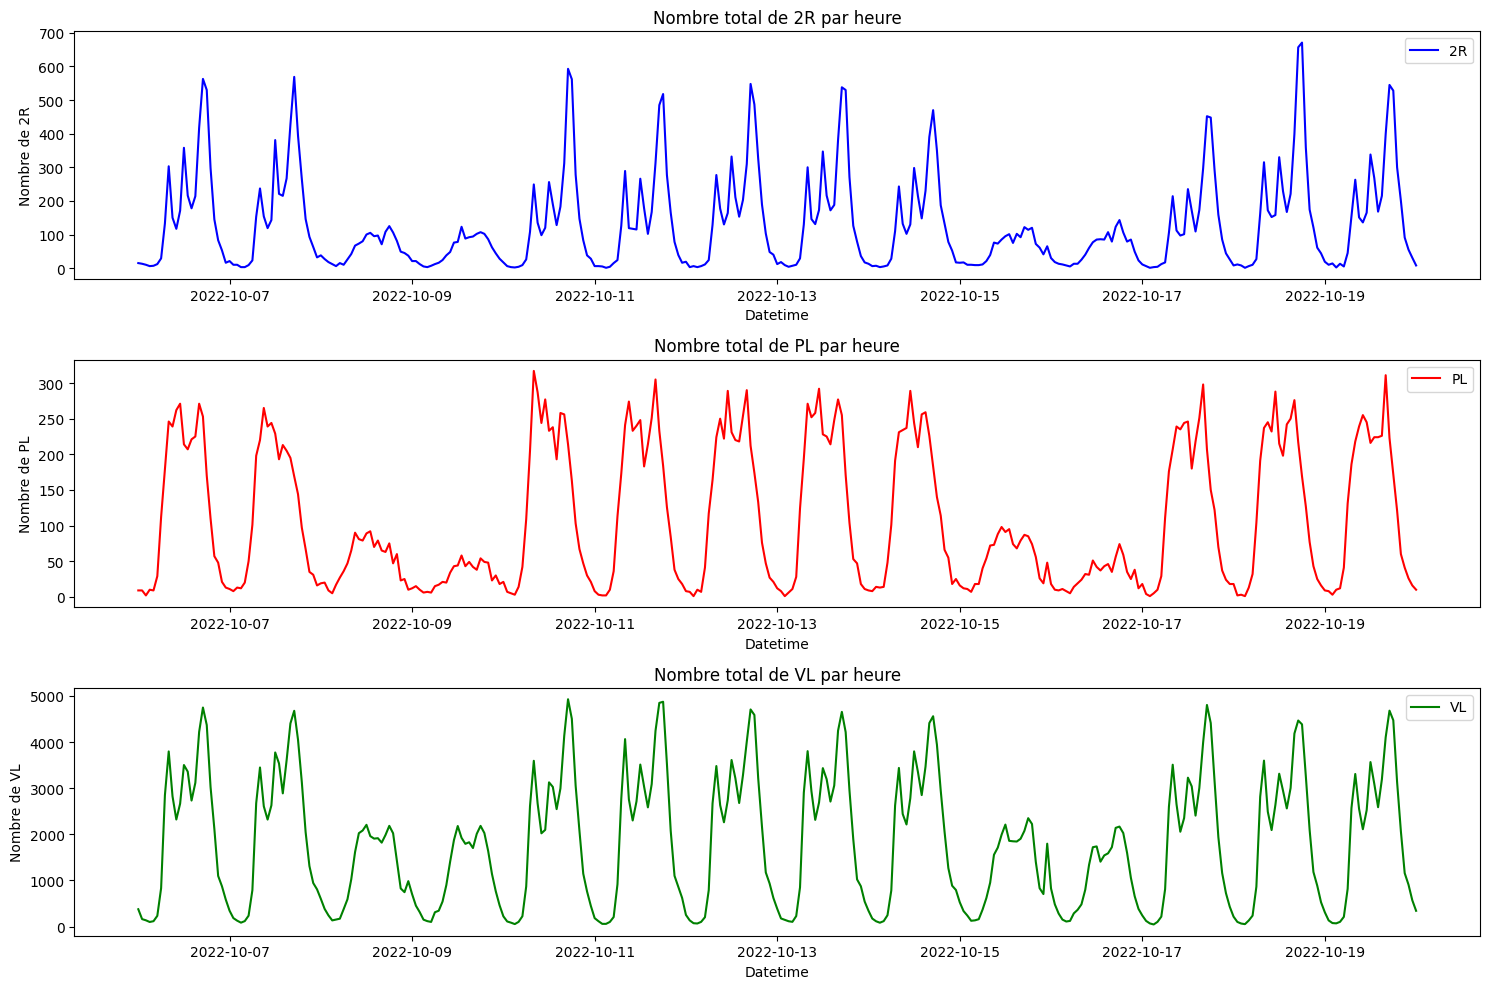

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_sortante.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])


df['2R_Total'] = df.filter(like='2R-P').sum(axis=1)
df['PL_Total'] = df.filter(like='PL-P').sum(axis=1)
df['VL_Total'] = df.filter(like='VL-P').sum(axis=1)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['Datetime'], df['2R_Total'], label='2R', color='blue')
plt.xlabel('Datetime')
plt.ylabel('Nombre de 2R')
plt.title('Nombre total de 2R par heure')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Datetime'], df['PL_Total'], label='PL', color='red')
plt.xlabel('Datetime')
plt.ylabel('Nombre de PL')
plt.title('Nombre total de PL par heure')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['Datetime'], df['VL_Total'], label='VL', color='green')
plt.xlabel('Datetime')
plt.ylabel('Nombre de VL')
plt.title('Nombre total de VL par heure')
plt.legend()

plt.tight_layout()
plt.show()

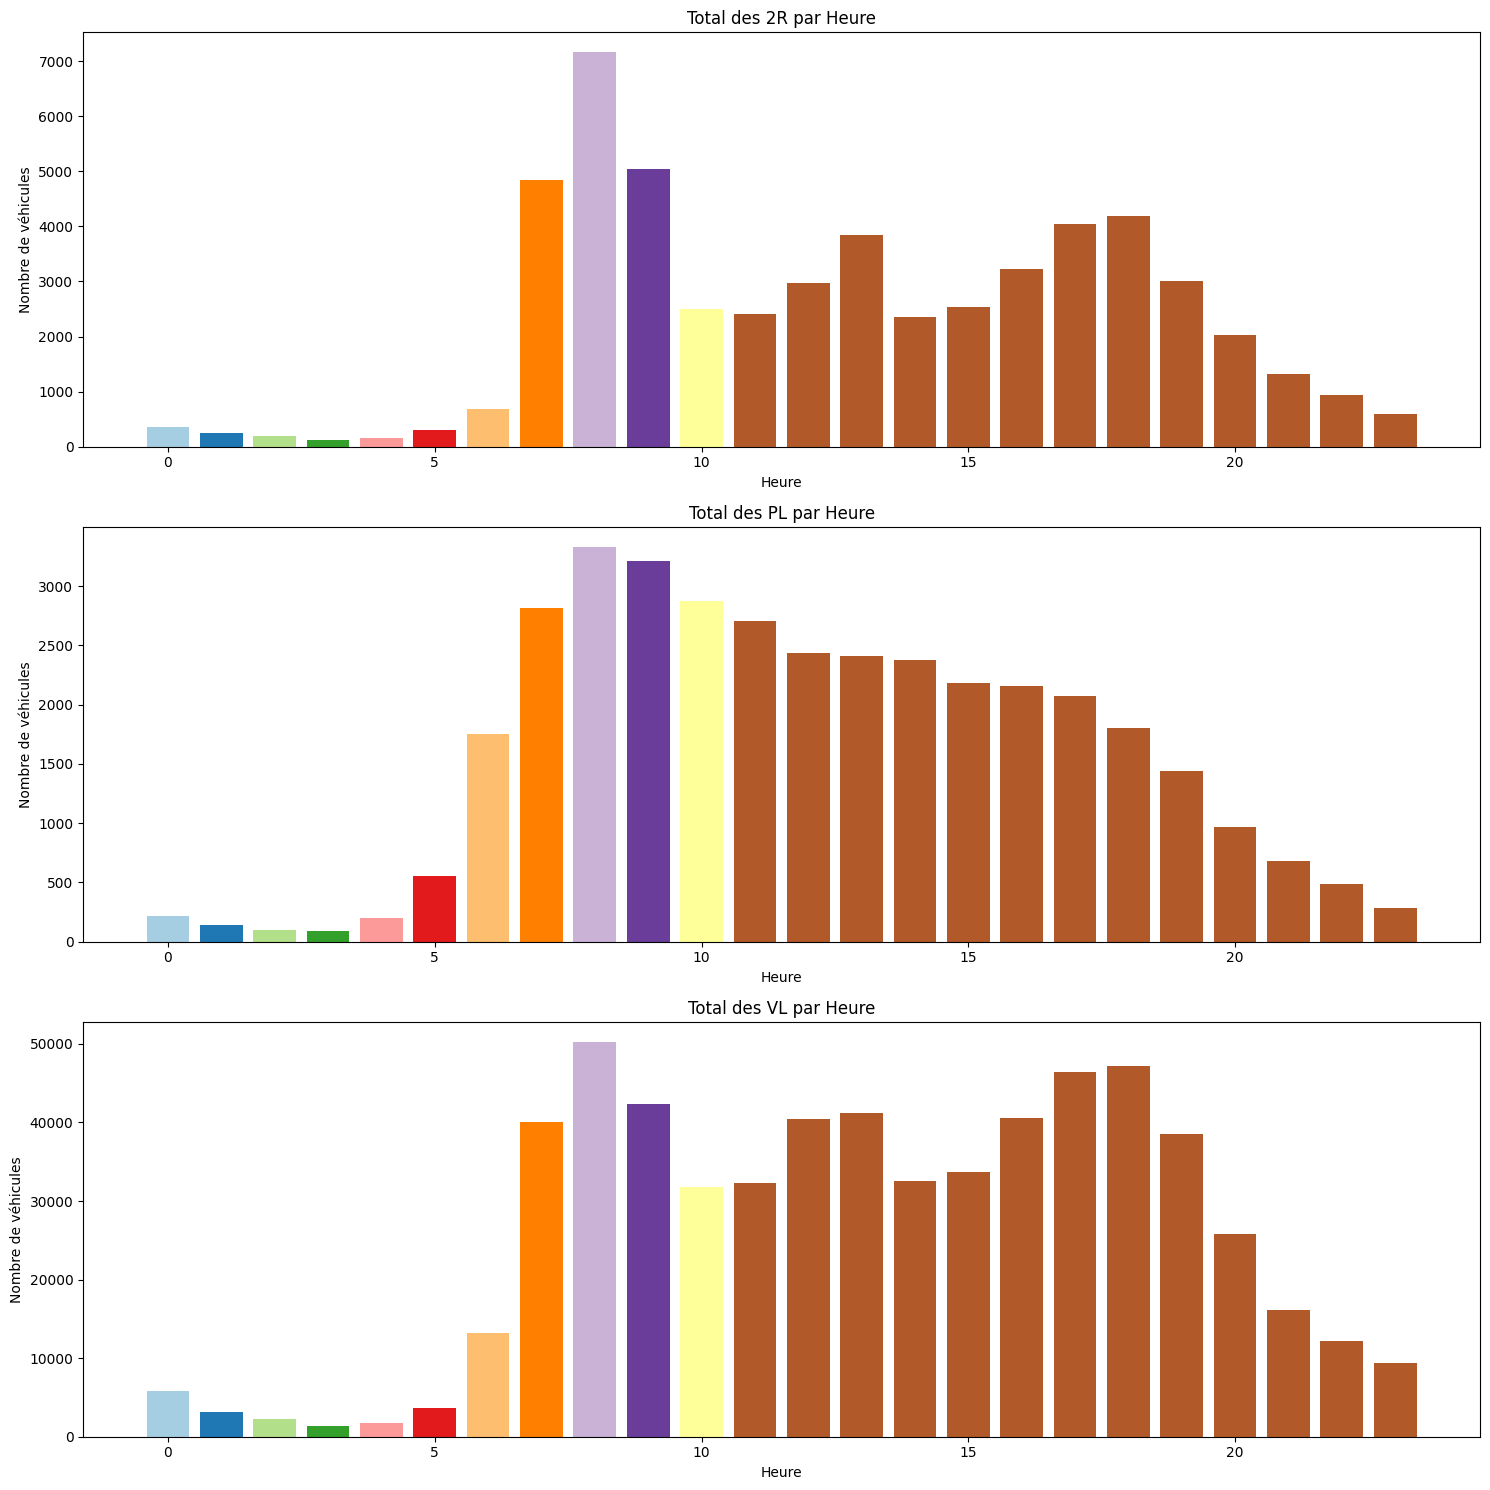

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data_entrante.csv')

columns_2R = [col for col in df.columns if col.startswith('2R')]
columns_PL = [col for col in df.columns if col.startswith('PL')]
columns_VL = [col for col in df.columns if col.startswith('VL')]

df['Total_2R'] = df[columns_2R].sum(axis=1)
df['Total_PL'] = df[columns_PL].sum(axis=1)
df['Total_VL'] = df[columns_VL].sum(axis=1)
hourly_totals = df.groupby('Hour').sum()

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

ax[0].bar(hourly_totals.index, hourly_totals['Total_2R'], color=plt.cm.Paired(range(len(hourly_totals))))
ax[0].set_title('Total des 2R par Heure')
ax[0].set_xlabel('Heure')
ax[0].set_ylabel('Nombre de véhicules')

ax[1].bar(hourly_totals.index, hourly_totals['Total_PL'], color=plt.cm.Paired(range(len(hourly_totals))))
ax[1].set_title('Total des PL par Heure')
ax[1].set_xlabel('Heure')
ax[1].set_ylabel('Nombre de véhicules')

ax[2].bar(hourly_totals.index, hourly_totals['Total_VL'], color=plt.cm.Paired(range(len(hourly_totals))))
ax[2].set_title('Total des VL par Heure')
ax[2].set_xlabel('Heure')
ax[2].set_ylabel('Nombre de véhicules')

plt.tight_layout()
plt.show()
